In [1]:
import os
import habitat
import habitat_sim
import magnum as mn
import warnings
from habitat.tasks.rearrange.rearrange_sim import RearrangeSim
warnings.filterwarnings('ignore')
from habitat_sim.utils.settings import make_cfg
from matplotlib import pyplot as plt
from habitat_sim.utils import viz_utils as vut
from omegaconf import DictConfig, OmegaConf
import numpy as np
from habitat.articulated_agents.robots import FetchRobot
from habitat.config.default import get_agent_config
from habitat.config.default_structured_configs import (
    ThirdRGBSensorConfig, 
    HeadRGBSensorConfig,
    HabitatSimSemanticSensorConfig,
    HeadDepthSensorConfig,
    HabitatSimDepthSensorConfig,
    HabitatSimFisheyeSemanticSensorConfig,
    HeadPanopticSensorConfig, 
    SimulatorConfig, 
    HabitatSimV0Config, 
    AgentConfig, 
    HumanoidJointActionConfig, 
    HumanoidPickActionConfig
)
from habitat_sim.physics import JointMotorSettings, MotionType
from habitat.articulated_agent_controllers import (
    HumanoidRearrangeController,
    HumanoidSeqPoseController,
)
from habitat.utils.humanoid_utils import MotionConverterSMPLX
from habitat.config.default_structured_configs import TaskConfig, EnvironmentConfig, DatasetConfig, HabitatConfig
from habitat.config.default_structured_configs import ArmActionConfig, BaseVelocityActionConfig, OracleNavActionConfig
from habitat.core.env import Env


/home/ramasamyn/miniconda3/envs/habitat/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pybullet build time: May 31 2024 15:30:11


In [2]:

def make_sim_cfg(agent_dict):
    # Start the scene config
    sim_cfg = SimulatorConfig(type="RearrangeSim-v0")
    
    # This is for better graphics
    sim_cfg.habitat_sim_v0.enable_hbao = True
    sim_cfg.habitat_sim_v0.enable_physics = True

    
    # # Set up an example scene
    sim_cfg.scene = "data/hab3_bench_assets/hab3-hssd/scenes/103997919_171031233.scene_instance.json"
    sim_cfg.scene_dataset = "data/hab3_bench_assets/hab3-hssd/hab3-hssd.scene_dataset_config.json"
    sim_cfg.additional_object_paths = ['data/objects/ycb/configs/']
    
    cfg = OmegaConf.create(sim_cfg)

    # Set the scene agents
    cfg.agents = agent_dict
    cfg.agents_order = list(cfg.agents.keys())
    return cfg

def make_hab_cfg(agent_dict, action_dict):
    sim_cfg = make_sim_cfg(agent_dict)
    task_cfg = TaskConfig(type="RearrangeEmptyTask-v0")
    task_cfg.actions = action_dict
    env_cfg = EnvironmentConfig()
    dataset_cfg = DatasetConfig(type="RearrangeDataset-v0", data_path="data/hab3_bench_assets/episode_datasets/small_large.json.gz")
    
    
    hab_cfg = HabitatConfig()   
    hab_cfg.environment = env_cfg
    hab_cfg.task = task_cfg
    hab_cfg.dataset = dataset_cfg
    hab_cfg.simulator = sim_cfg
    hab_cfg.simulator.seed = hab_cfg.seed

    return hab_cfg

def init_rearrange_env(agent_dict, action_dict):
    hab_cfg = make_hab_cfg(agent_dict, action_dict)
    res_cfg = OmegaConf.create(hab_cfg)
    return Env(res_cfg)

In [3]:

agent_0_config = AgentConfig()
urdf_path = "data/humanoids/humanoid_data/female_0/female_0.urdf"
agent_0_config.articulated_agent_urdf = urdf_path
agent_0_config.articulated_agent_type = "KinematicHumanoid"
agent_0_config.motion_data_path = "data/humanoids/humanoid_data/female_0/female_0_motion_data_smplx.pkl"

agent_1_config = AgentConfig()
urdf_path = "data/humanoids/humanoid_data/female_1/female_1.urdf"
agent_1_config.articulated_agent_urdf = urdf_path
agent_1_config.articulated_agent_type = "KinematicHumanoid"
agent_1_config.motion_data_path = "data/humanoids/humanoid_data/female_1/female_1_motion_data_smplx.pkl"

agent_2_config = AgentConfig()
urdf_path = "data/humanoids/humanoid_data/female_2/female_2.urdf"
agent_2_config.articulated_agent_urdf = urdf_path
agent_2_config.articulated_agent_type = "KinematicHumanoid"
agent_2_config.motion_data_path = "data/humanoids/humanoid_data/female_2/female_2_motion_data_smplx.pkl"

agent_3_config = AgentConfig()
urdf_path = "data/humanoids/humanoid_data/female_3/female_3.urdf"
agent_3_config.articulated_agent_urdf = urdf_path
agent_3_config.articulated_agent_type = "KinematicHumanoid"
agent_3_config.motion_data_path = "data/humanoids/humanoid_data/female_3/female_3_motion_data_smplx.pkl"

agent_4_config = AgentConfig()
urdf_path = "data/humanoids/humanoid_data/male_0/male_0.urdf"
agent_4_config.articulated_agent_urdf = urdf_path
agent_4_config.articulated_agent_type = "KinematicHumanoid"
agent_4_config.motion_data_path = "data/humanoids/humanoid_data/male_1/male_1_motion_data_smplx.pkl"

agent_5_config = AgentConfig()
urdf_path = "data/humanoids/humanoid_data/male_1/male_1.urdf"
agent_5_config.articulated_agent_urdf = urdf_path
agent_5_config.articulated_agent_type = "KinematicHumanoid"
agent_5_config.motion_data_path = "data/humanoids/humanoid_data/male_1/male_1_motion_data_smplx.pkl"

agent_6_config = AgentConfig()
urdf_path = "data/humanoids/humanoid_data/male_2/male_2.urdf"
agent_6_config.articulated_agent_urdf = urdf_path
agent_6_config.articulated_agent_type = "KinematicHumanoid"
agent_6_config.motion_data_path = "data/humanoids/humanoid_data/male_2/male_2_motion_data_smplx.pkl"

agent_7_config = AgentConfig()
urdf_path = "data/humanoids/humanoid_data/male_3/male_3.urdf"
agent_7_config.articulated_agent_urdf = urdf_path
agent_7_config.articulated_agent_type = "KinematicHumanoid"
agent_7_config.motion_data_path = "data/humanoids/humanoid_data/male_3/male_3_motion_data_smplx.pkl"

agent_8_config = AgentConfig()
urdf_path = "data/humanoids/humanoid_data/neutral_0/neutral_0.urdf"
agent_8_config.articulated_agent_urdf = urdf_path
agent_8_config.articulated_agent_type = "KinematicHumanoid"
agent_8_config.motion_data_path = "data/humanoids/humanoid_data/neutral_0/neutral_0_motion_data_smplx.pkl"

agent_9_config = AgentConfig()
urdf_path = "data/humanoids/humanoid_data/neutral_1/neutral_1.urdf"
agent_9_config.articulated_agent_urdf = urdf_path
agent_9_config.articulated_agent_type = "KinematicHumanoid"
agent_9_config.motion_data_path = "data/humanoids/humanoid_data/neutral_1/neutral_1_motion_data_smplx.pkl"

agent_10_config = AgentConfig()
urdf_path = "data/humanoids/humanoid_data/neutral_2/neutral_2.urdf"
agent_10_config.articulated_agent_urdf = urdf_path
agent_10_config.articulated_agent_type = "KinematicHumanoid"
agent_10_config.motion_data_path = "data/humanoids/humanoid_data/neutral_2/neutral_2_motion_data_smplx.pkl"

agent_11_config = AgentConfig()
urdf_path = "data/humanoids/humanoid_data/neutral_3/neutral_3.urdf"
agent_11_config.articulated_agent_urdf = urdf_path
agent_11_config.articulated_agent_type = "KinematicHumanoid"
agent_11_config.motion_data_path = "data/humanoids/humanoid_data/neutral_3/neutral_3_motion_data_smplx.pkl"


agents = [
    agent_0_config, agent_1_config, agent_2_config, agent_3_config,
    agent_4_config, agent_5_config, agent_6_config, agent_7_config,
    agent_8_config, agent_9_config, agent_10_config, agent_11_config,
]

for agent_config in agents:
    agent_config.sim_sensors = {
        "third_rgb": ThirdRGBSensorConfig(),
        "head_rgb": HeadRGBSensorConfig()}

# We create a dictionary with names of agents and their corresponding agent configuration
agent_dict = {
    "agent_0": agent_0_config,
    "agent_1": agent_1_config,
    "agent_2": agent_2_config,
    "agent_3": agent_3_config,
    "agent_4": agent_4_config,
    "agent_5": agent_5_config,
    "agent_6": agent_6_config,
    "agent_7": agent_7_config,
    "agent_8": agent_8_config,
    "agent_9": agent_9_config,
    "agent_10": agent_10_config,
    "agent_11": agent_11_config
}





In [4]:
# Define the actions

# Assuming you have imported necessary classes like HumanoidJointActionConfig and FetchRobotActionConfig

action_dict = {
    "agent_0_humanoid_joint_action": HumanoidJointActionConfig(),
    "agent_1_humanoid_joint_action": HumanoidJointActionConfig(),
    "agent_2_humanoid_joint_action": HumanoidJointActionConfig(),
    "agent_3_humanoid_joint_action": HumanoidJointActionConfig(),
    "agent_4_humanoid_joint_action": HumanoidJointActionConfig(),
    "agent_5_humanoid_joint_action": HumanoidJointActionConfig(),
    "agent_6_humanoid_joint_action": HumanoidJointActionConfig(),
    "agent_7_humanoid_joint_action": HumanoidJointActionConfig(),
    "agent_8_humanoid_joint_action": HumanoidJointActionConfig(),
    "agent_9_humanoid_joint_action": HumanoidJointActionConfig(),
    "agent_10_humanoid_joint_action": HumanoidJointActionConfig(),
    "agent_11_humanoid_joint_action": HumanoidJointActionConfig()
}

env = init_rearrange_env(agent_dict, action_dict)


2024-06-21 13:17:17,945 Initializing dataset RearrangeDataset-v0
2024-06-21 13:17:17,946 initializing sim RearrangeSim-v0
[13:17:18:044049]:[Warning]:[Metadata] SceneDatasetAttributes.cpp(107)::addNewSceneInstanceToDataset : Dataset : 'hab3-hssd' : Lighting Layout Attributes 'data/hab3_bench_assets/hab3-hssd/scenes/103997919_171031233.scene_instance.json' specified in Scene Attributes but does not exist in dataset, so creating default.
[13:17:18:044100]:[Warning]:[Scene] SemanticScene.h(328)::checkFileExists : ::loadSemanticSceneDescriptor: File../hssd-hab_semantic_lexicon.jsondoes not exist.  Aborting load.
[13:17:18:044106]:[Warning]:[Scene] SemanticScene.cpp(121)::loadSemanticSceneDescriptor : SSD File Naming Issue! Neither SemanticAttributes-provided name : `../hssd-hab_semantic_lexicon.json` nor constructed filename : `../info_semantic.json` exist on disk.
[13:17:18:044109]:[Error]:[Scene] SemanticScene.cpp(137)::loadSemanticSceneDescriptor : SSD Load Failure! File with SemanticAt

Renderer: NVIDIA GeForce RTX 4090/PCIe/SSE2 by NVIDIA Corporation
OpenGL version: 4.6.0 NVIDIA 535.171.04
Using optional features:
    GL_ARB_vertex_array_object
    GL_ARB_separate_shader_objects
    GL_ARB_robustness
    GL_ARB_texture_storage
    GL_ARB_texture_view
    GL_ARB_framebuffer_no_attachments
    GL_ARB_invalidate_subdata
    GL_ARB_texture_storage_multisample
    GL_ARB_multi_bind
    GL_ARB_direct_state_access
    GL_ARB_get_texture_sub_image
    GL_ARB_texture_filter_anisotropic
    GL_KHR_debug
    GL_KHR_parallel_shader_compile
    GL_NV_depth_buffer_float
Using driver workarounds:
    no-forward-compatible-core-context
    nv-egl-incorrect-gl11-function-pointers
    no-layout-qualifiers-on-old-glsl
    nv-zero-context-profile-mask
    nv-implementation-color-read-format-dsa-broken
    nv-cubemap-inconsistent-compressed-image-size
    nv-cubemap-broken-full-compressed-image-query
    nv-compressed-block-size-in-bits


MeshTools::compile(): ignoring unknown/unsupported attribute Trade::MeshAttribute::Custom(0)
MeshTools::compile(): ignoring unknown/unsupported attribute Trade::MeshAttribute::Custom(1)
MeshTools::compile(): ignoring unknown/unsupported attribute Trade::MeshAttribute::Custom(0)
MeshTools::compile(): ignoring unknown/unsupported attribute Trade::MeshAttribute::Custom(1)
MeshTools::compile(): ignoring unknown/unsupported attribute Trade::MeshAttribute::Custom(0)
MeshTools::compile(): ignoring unknown/unsupported attribute Trade::MeshAttribute::Custom(1)
MeshTools::compile(): ignoring unknown/unsupported attribute Trade::MeshAttribute::Custom(0)
MeshTools::compile(): ignoring unknown/unsupported attribute Trade::MeshAttribute::Custom(1)
MeshTools::compile(): ignoring unknown/unsupported attribute Trade::MeshAttribute::Custom(0)
MeshTools::compile(): ignoring unknown/unsupported attribute Trade::MeshAttribute::Custom(1)
MeshTools::compile(): ignoring unknown/unsupported attribute Trade::Me

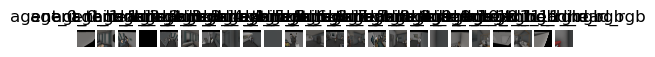

In [5]:
obs = env.reset()
_, ax = plt.subplots(1,len(obs.keys()))

for ind, name in enumerate(obs.keys()):
    ax[ind].imshow(obs[name])
    ax[ind].set_axis_off()
    ax[ind].set_title(name)

In [6]:
sim = env.sim
observations = []
num_iter = 100
pos_delta = mn.Vector3(0.02,0,0)
rot_delta = np.pi / (8 * num_iter)
# art_agent = sim.articulated_agent
sim.reset()
# set_fixed_camera(sim)
for _ in range(num_iter):
    for i in range(len(sim.agents_mgr)):
        art_agent = sim.agents_mgr[i].articulated_agent
        art_agent.base_pos = art_agent.base_pos + pos_delta
        art_agent.base_rot = art_agent.base_rot + rot_delta
        sim.step({})
        observations.append(sim.get_sensor_observations())


vut.make_video(
    observations,
    "agent_3_third_rgb",
    "color",
    "robot_tutorial_video",
    open_vid=True,
)

Encoding the video: robot_tutorial_video.mp4 


In [ ]:
import random

def random_rotation():
    random_dir = mn.Vector3(np.random.rand(3)).normalized()
    random_angle = random.random() * np.pi
    random_rat = mn.Quaternion.rotation(mn.Rad(random_angle), random_dir)
    return random_rat

def custom_sample_humanoid():
    base_transform = mn.Matrix4() 
    random_rot = random_rotation()
    offset_transform = mn.Matrix4.from_(random_rot.to_matrix(), mn.Vector3())
    joints = []
    num_joints = 54
    for _ in range(num_joints):
        Q = random_rotation()
        joints = joints + list(Q.vector) + [float(Q.scalar)]
    offset_trans = list(np.asarray(offset_transform.transposed()).flatten())
    base_trans = list(np.asarray(base_transform.transposed()).flatten())
    random_vec = joints + offset_trans + base_trans
    return {
        "agent_0_human_joints_trans": random_vec,
        "agent_1_human_joints_trans": random_vec,
        "agent_2_human_joints_trans": random_vec
    }


In [ ]:
# We can now call the defined actions
observations = []
num_iter = 40
env.reset()
for _ in range(num_iter):
    params = custom_sample_humanoid()
    action_dict = {
        "action": "agent_0_humanoid_joint_action",
        "action_args": params
    }
    observations.append(env.step(action_dict))
vut.make_video(
    observations,
    "agent_3_third_rgb",
    "color",
    "robot_tutorial_video",
    open_vid=True,
)


SyntaxError: positional argument follows keyword argument (1135494066.py, line 18)

In [ ]:
from habitat.utils.humanoid_utils import MotionConverterSMPLX
PATH_TO_URDF = "habitat-lab/data/humanoids/humanoid_data/male_0/male_0.urdf"
PATH_TO_MOTION_NPZ = "data/humanoids/humanoid_data/walk_motion/CMU_10_04_stageii.npz"
convert_helper = MotionConverterSMPLX(urdf_path=PATH_TO_URDF)
convert_helper.convert_motion_file(
    motion_path=PATH_TO_MOTION_NPZ,
    output_path=PATH_TO_MOTION_NPZ.replace(".npz", ""),
)
env.reset()
motion_path = "habitat-lab/data/humanoids/humanoid_data/male_0/male_0_motion_data_smplx.pkl" 
# We define here humanoid controller
humanoid_controller = HumanoidSeqPoseController(motion_path)


# Because we want the humanoid controller to generate a motion relative to the current agent, we need to set
# the reference pose
humanoid_controller.reset(env.sim.articulated_agent.base_transformation)
humanoid_controller.apply_base_transformation(env.sim.articulated_agent.base_transformation)


In [ ]:
observations = []
for _ in range(humanoid_controller.humanoid_motion.num_poses):
    # These computes the current pose and calculates the next pose
    humanoid_controller.calculate_pose()
    humanoid_controller.next_pose()
    
    # The get_pose function gives as a humanoid pose in the same format as HumanoidJointAction
    new_pose = humanoid_controller.get_pose()
    action_dict = {
        "action": "agent_0_humanoid_joint_action",
        "action_args": {"agent_0_human_joints_trans": new_pose}
    }
    observations.append(env.step(action_dict))
    
vut.make_video(
    observations,
    "agent_3_third_rgb",
    "color",
    "robot_tutorial_video",
    open_vid=True,
)

NameError: name 'humanoid_controller' is not defined

In [ ]:
# As before, we first define the controller, here we use a special motion file we provide for each agent.
motion_path = "data/hab3_bench_assets/humanoids/female_0/female_0_motion_data_smplx.pkl" 
# We define here humanoid controller
humanoid_controller = HumanoidRearrangeController(motion_path)

In [ ]:
# We reset the controller
env.reset()

# Initialize a list to store observations for each agent
observations = []

# Iterate over all agents in the manager
for i in range(len(env.sim.agents_mgr)):
    # Get the current agent
    art_agent = env.sim.agents_mgr[i].articulated_agent

    # Reset the humanoid controller with the agent's base transformation
    humanoid_controller.reset(art_agent.base_transformation)

    # Iterate over a certain number of steps
    for _ in range(100):
        # This computes a pose that moves the agent to relative_position
        relative_position = art_agent.base_pos + mn.Vector3(0,0,1)
        humanoid_controller.calculate_walk_pose(relative_position)
        
        # The get_pose function gives as a humanoid pose in the same format as HumanoidJointAction
        new_pose = humanoid_controller.get_pose()
        action_dict = {
            "action": "agent_0_humanoid_joint_action",
            "action_args": {"agent_0_human_joints_trans": new_pose}
        }
        observations.append(env.step(action_dict))
    
# Create a video of the agent's movements
vut.make_video(
    observations,
    "agent_3_third_rgb",
    "color",
    "robot_tutorial_video",
    open_vid=True,
)


Encoding the video: robot_tutorial_video.mp4 


gio: file:///home/ramasamyn/habitat-lab/code/robot_tutorial_video.mp4: Failed to find default application for content type ‘video/mp4’


In [ ]:
# We reset the controller
env.reset()

# Initialize a list to store observations for each agent
observations = []

# Iterate over all agents in the manager
for i in range(len(env.sim.agents_mgr)):
    # Get the current agent
    art_agent = env.sim.agents_mgr[i].articulated_agent

    # Reset the humanoid controller with the agent's base transformation
    humanoid_controller.reset(art_agent.base_transformation)

    # Print the agent's base position
    print(art_agent.base_pos)

    # Get the hand pose
    offset =  art_agent.base_transformation.transform_vector(mn.Vector3(0, 0.3, 0))
    hand_pose = art_agent.ee_transform(0).translation + offset

    # Iterate over a certain number of steps
    for _ in range(100):
        # This computes a pose that moves the agent to relative_position
        hand_pose = hand_pose + mn.Vector3((np.random.rand(3) - 0.5) * 0.1)
        humanoid_controller.calculate_reach_pose(hand_pose, index_hand=0)
        
        # The get_pose function gives as a humanoid pose in the same format as HumanoidJointAction
        new_pose = humanoid_controller.get_pose()
        action_dict = {
            "action": "agent_0_humanoid_joint_action",
            "action_args": {"agent_0_human_joints_trans": new_pose}
        }
        observations.append(env.step(action_dict))
    
# Create a video of the agent's movements
vut.make_video(
    observations,
    "agent_3_third_rgb",
    "color",
    "robot_tutorial_video",
    open_vid=True,
)


Vector(-2.96314, 0.180179, -3.36288)
Vector(-4.26902, 0.180179, 0.594973)
Vector(-1.12954, 0.180179, -6.37718)
Encoding the video: robot_tutorial_video.mp4 


gio: file:///home/ramasamyn/habitat-lab/code/robot_tutorial_video.mp4: Failed to find default application for content type ‘video/mp4’


In [ ]:
# Define the actions


action_dict = {
    "humanoid_joint_action": HumanoidJointActionConfig(),
    "humanoid_navigate_action": OracleNavActionConfig(type="OracleNavCoordinateAction", 
                                                      motion_control="human_joints",
                                                      spawn_max_dist_to_obj=1.0),
    "humanoid_pick_obj_id_action": HumanoidPickActionConfig(type="HumanoidPickObjIdAction")
    
}
env = init_rearrange_env(agent_dict, action_dict)

2024-06-13 17:32:40,604 Initializing dataset RearrangeDataset-v0
2024-06-13 17:32:40,606 initializing sim RearrangeSim-v0
[17:32:40:627737]:[Warning]:[Metadata] SceneDatasetAttributes.cpp(107)::addNewSceneInstanceToDataset : Dataset : 'hab3-hssd' : Lighting Layout Attributes 'data/hab3_bench_assets/hab3-hssd/scenes/103997919_171031233.scene_instance.json' specified in Scene Attributes but does not exist in dataset, so creating default.
[17:32:40:627780]:[Warning]:[Scene] SemanticScene.h(328)::checkFileExists : ::loadSemanticSceneDescriptor: File../hssd-hab_semantic_lexicon.jsondoes not exist.  Aborting load.
[17:32:40:627785]:[Warning]:[Scene] SemanticScene.cpp(121)::loadSemanticSceneDescriptor : SSD File Naming Issue! Neither SemanticAttributes-provided name : `../hssd-hab_semantic_lexicon.json` nor constructed filename : `../info_semantic.json` exist on disk.
[17:32:40:627788]:[Error]:[Scene] SemanticScene.cpp(137)::loadSemanticSceneDescriptor : SSD Load Failure! File with SemanticAt

AssertionError: Error in action: humanoid_joint_action. Multiagent actions should start with agent_X.